In [125]:
# import our dependencies

%matplotlib inline
from collections import Counter
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import numpy as np
import os

## PCA + Oversampling (Random Oversampling) + Logistic Regression (SFRs)

In [126]:
file = 'Hollywood_Hills_East_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [127]:
path = os.path.join(location, file)

In [128]:
# bring in our dataframe

Hollywood_Hills_East_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_East_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0
5577038025,0,0,6352 Innsdale Dr,0,0,0,1204724,890187,314537,0,...,0,0,0,0,0,0,0,0,0,0
5577036009,0,0,6324 Tahoe Dr,0,0,1,1125742,909097,216645,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# drop any nulls

Hollywood_Hills_East_df = Hollywood_Hills_East_df.dropna()

In [130]:
len(Hollywood_Hills_East_df)

4017

In [131]:
# Change the datatype of these two columns into ints

Hollywood_Hills_East_df['TAXAMT'] = Hollywood_Hills_East_df['TAXAMT'].astype(int)
Hollywood_Hills_East_df['EFFYRBLT'] = Hollywood_Hills_East_df['EFFYRBLT'].astype(int)

In [132]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hollywood_Hills_East_df = Hollywood_Hills_East_df[~Hollywood_Hills_East_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_East_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
len(Hollywood_Hills_East_df)

3500

In [134]:
# Now drop the SiteAddress column
Hollywood_Hills_East_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [135]:
Hollywood_Hills_East_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,0,0,1,1214294,871974,342320,0,1,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,0,0,1,641575,485483,156092,0,1,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,0,0,1,2867782,1837599,1030183,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
Hollywood_Hills_East_df.columns

Index(['Owned by Trust?', 'Owned by Business?', 'MAIL DIFFERENT FROM SITE?',
       'MAIL OUTSIDE CA?', 'TITLECO1', 'ASSDTOTAL', 'ASSDLAND', 'ASSDSTCT',
       'ASSDOTHR', 'EXEMPTCD', 'EXMPTAMT', 'PCNTIMPD', 'TAXAMT',
       'DOCDATE_YEAR', 'MULTIPARCEL', 'PRICE', 'LENDER1', 'LOANAMOUT1',
       'LOANTYPE1', 'YEARBLT', 'EFFYRBLT', 'LOTSQFT', 'TOTALSF', 'GRGTYPE',
       'BLDGMAT', 'TOTUNITS', 'QUALCLAS', 'BLDGCOND', 'NOSTORY', 'ROOFMAT',
       'FOUNDATN', 'BEDROOMS', 'BATHROOMS', 'FAMILYRM', 'DININGRM', 'POOL',
       'PATIO', 'FIREPLCE', 'AIRMTHOD', 'HEATMTHD', 'VIEW', 'Did it sell?',
       'GRANT DEED', 'INTERSPOUSAL', 'JOINT TENANT', 'Other', 'PARTNERSHIP',
       'QUIT CLAIM', 'RE-RECORD', 'TAX DEED', 'TRUST TRANSFER', 'TRUSTEES',
       'WARRANTY'],
      dtype='object')

In [137]:
# Step 1: Create our X and y

y = Hollywood_Hills_East_df['Did it sell?']
#X = Hollywood_Hills_East_df(['Did it sell?'], 1)
X = Hollywood_Hills_East_df[['Owned by Trust?', 'Owned by Business?', 'MAIL DIFFERENT FROM SITE?',
       'MAIL OUTSIDE CA?', 'TITLECO1', 'ASSDTOTAL', 'ASSDLAND', 'ASSDSTCT',
       'ASSDOTHR', 'EXEMPTCD', 'EXMPTAMT', 'PCNTIMPD', 'TAXAMT',
       'DOCDATE_YEAR', 'MULTIPARCEL', 'PRICE', 'LENDER1', 'LOANAMOUT1',
       'LOANTYPE1', 'YEARBLT', 'EFFYRBLT', 'LOTSQFT', 'TOTALSF', 'GRGTYPE',
       'BLDGMAT', 'TOTUNITS', 'QUALCLAS', 'BLDGCOND', 'NOSTORY', 'ROOFMAT',
       'FOUNDATN', 'BEDROOMS', 'BATHROOMS', 'FAMILYRM', 'DININGRM', 'POOL',
       'PATIO', 'FIREPLCE', 'AIRMTHOD', 'HEATMTHD', 'VIEW',
       'GRANT DEED', 'INTERSPOUSAL', 'JOINT TENANT', 'Other', 'PARTNERSHIP',
       'QUIT CLAIM', 'RE-RECORD', 'TAX DEED', 'TRUST TRANSFER', 'TRUSTEES',
       'WARRANTY']]

In [138]:
APN = Hollywood_Hills_East_df.index.values
APN

array([5586017003, 5579035002, 5585001002, ..., 2428006041, 2427008043,
       5585017033])

In [139]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [140]:
X_pca

array([[  -22213.1219468 ,  -727047.1717739 ,    60768.16195909],
       [ -549842.57195944,  -243774.2651712 ,    71050.5433429 ],
       [ 1802811.29776477, -1712399.79249876,  -946820.32537219],
       ...,
       [ -499566.82568289,  -286604.0866326 ,    71826.58812759],
       [  141761.63488336,  -872511.49716167,    60146.76081435],
       [ -280920.08346389,  -484502.95902273,    68847.94810218]])

In [141]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [142]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [143]:
X_train_scaled_APN = []

In [144]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 2322, 1: 2322})

In [145]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [146]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [147]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.632


In [148]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5466331516872618

In [149]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.6967851474335639

In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[509, 265],
       [ 57,  44]])

In [57]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.66      0.44      0.76      0.54      0.29       774
          1       0.14      0.44      0.66      0.21      0.54      0.28       101

avg / total       0.81      0.63      0.46      0.70      0.54      0.29       875



In [58]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results.sample(20)

,Prediction,Actual,PARCEL
724,0,0,5577037002
602,1,1,5585029045
818,0,0,2428026016
655,0,0,5579021018
849,0,1,5580009021
755,1,0,5586019017
222,0,0,2427001019
44,1,0,5579034019
123,0,0,2428026014
2,0,0,2428003045


In [59]:
Hollywood_Hills_East_Results_SFRs_df = Hollywood_Hills_East_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
Hollywood_Hills_East_Results_SFRs_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY,Prediction,Actual
0,5586017003,1,0,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,5579035002,0,0,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,1,0,0,0.0,0.0
2,5585001002,1,0,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,5577038025,0,0,0,0,0,1204724,890187,314537,0,...,0,0,0,0,0,0,0,0,1.0,0.0
4,5577036009,0,0,0,0,1,1125742,909097,216645,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [61]:
Hollywood_Hills_East_Results_SFRs_df = pd.DataFrame(Hollywood_Hills_East_Results_SFRs_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Actual'])
Hollywood_Hills_East_Results_SFRs_df.head()

,PARCEL,Did it sell?,Prediction,Actual
0,5586017003,0,0.0,0.0
1,5579035002,0,0.0,0.0
2,5585001002,0,NaN,NaN
3,5577038025,0,1.0,0.0
4,5577036009,0,NaN,NaN


In [62]:
Hollywood_Hills_East_Results_SFRs_df.to_csv('Hollywood_Hills_East_Results_SFRs.csv')

# Same as above but w/ feature reduction

In [107]:
file = 'Hollywood_Hills_East_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [108]:
path = os.path.join(location, file)

In [109]:
# bring in our dataframe

Hollywood_Hills_East_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_East_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0
5577038025,0,0,6352 Innsdale Dr,0,0,0,1204724,890187,314537,0,...,0,0,0,0,0,0,0,0,0,0
5577036009,0,0,6324 Tahoe Dr,0,0,1,1125742,909097,216645,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# drop any nulls

Hollywood_Hills_East_df = Hollywood_Hills_East_df.dropna()

In [111]:
# Change the datatype of these two columns into ints

Hollywood_Hills_East_df['TAXAMT'] = Hollywood_Hills_East_df['TAXAMT'].astype(int)
Hollywood_Hills_East_df['EFFYRBLT'] = Hollywood_Hills_East_df['EFFYRBLT'].astype(int)

In [112]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hollywood_Hills_East_df = Hollywood_Hills_East_df[~Hollywood_Hills_East_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_East_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# Now drop the SiteAddress column
Hollywood_Hills_East_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [114]:
Hollywood_Hills_East_df['PARCEL_1'] = Hollywood_Hills_East_df.index.values

In [115]:
# Create our X and y

y = Hollywood_Hills_East_df['Did it sell?']

X = pd.DataFrame(Hollywood_Hills_East_df, columns = ['PARCEL_1',
                                                     'TOTALSF',
                                                     'ASSDLAND',
                                                     'ASSDSTCT',
                                                     'LOTSQFT',
                                                     'ASSDTOTAL',
                                                     'PCNTIMPD',
                                                     'TAXAMT',
                                                     'DOCDATE_YEAR',
                                                     'YEARBLT',
                                                     'EFFYRBLT',
                                                     'PRICE',
                                                     'LOANAMOUT1',
                                                     'BEDROOMS',
                                                     'TOTUNITS', 
                                                     'PATIO',
                                                     'DININGRM',
                                                     'Owned by Trust?',
                                                     'BATHROOMS',
                                                     'QUIT CLAIM',
                                                     'MAIL DIFFERENT FROM SITE?',
                                                     'POOL',
                                                     'NOSTORY',
                                                     'BLDGCOND',
                                                     'TITLECO1',
                                                     'GRANT DEED',
                                                     'VIEW'])

In [116]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [117]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [118]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [119]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 2322, 1: 2322})

In [120]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [121]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [122]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.334


In [123]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.6233850129198967

In [124]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.3798645928705794

# PCA + Oversampling (Random Oversampling) + Logistic Regression (Condos)

In [151]:
# bring in our dataframe

Hollywood_Hills_East_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_East_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0
5577038025,0,0,6352 Innsdale Dr,0,0,0,1204724,890187,314537,0,...,0,0,0,0,0,0,0,0,0,0
5577036009,0,0,6324 Tahoe Dr,0,0,1,1125742,909097,216645,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# drop any nulls

Hollywood_Hills_East_df = Hollywood_Hills_East_df.dropna()

In [153]:
len(Hollywood_Hills_East_df)

4017

In [154]:
# Change the datatype of these two columns into ints

Hollywood_Hills_East_df['TAXAMT'] = Hollywood_Hills_East_df['TAXAMT'].astype(int)
Hollywood_Hills_East_df['EFFYRBLT'] = Hollywood_Hills_East_df['EFFYRBLT'].astype(int)

In [155]:
# Make sure our dataframe is only Condos

Hollywood_Hills_East_df = Hollywood_Hills_East_df[Hollywood_Hills_East_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_East_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5576001050,0,0,2260 N Cahuenga Blvd #308,0,0,1,233350,125784,107566,0,...,0,0,0,0,0,0,0,0,0,0
5579039019,0,0,3033 Hollycrest Dr #3,1,0,0,131234,52489,78745,0,...,0,0,1,0,0,0,0,0,0,0
5579039020,0,0,3033 Hollycrest Dr #4,1,0,0,131234,52489,78745,0,...,0,0,1,0,0,0,0,0,0,0


In [156]:
len(Hollywood_Hills_East_df)

517

In [157]:
# Now drop the SiteAddress column
Hollywood_Hills_East_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [158]:
Hollywood_Hills_East_df.head(3)

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5576001050,0,0,0,0,1,233350,125784,107566,0,1,...,0,0,0,0,0,0,0,0,0,0
5579039019,0,0,1,0,0,131234,52489,78745,0,0,...,0,0,1,0,0,0,0,0,0,0
5579039020,0,0,1,0,0,131234,52489,78745,0,0,...,0,0,1,0,0,0,0,0,0,0


In [159]:
# Step 1: Create our X and y

y = Hollywood_Hills_East_df['Did it sell?']
X = Hollywood_Hills_East_df.drop(['Did it sell?'], 1)

In [160]:
APN = Hollywood_Hills_East_df.index.values
APN

array([5576001050, 5579039019, 5579039020, 5586011046, 5577010059,
       5577010018, 5577010104, 5577010031, 5582012017, 5577007150,
       5586014105, 5576001036, 5577007117, 5586009024, 5586014120,
       5576001063, 5586014075, 5576001057, 5586014053, 5586009021,
       5579039017, 5586008026, 5577010174, 5577010171, 5577010085,
       5586014052, 5577010030, 5577010161, 5577010007, 5577010143,
       5577010117, 5577010126, 5577010089, 5577010041, 5577010166,
       5577010162, 5577010111, 5577010082, 5586014033, 5585021027,
       5586008024, 5586011038, 5577010076, 5577010078, 5577010098,
       5577010006, 5577010013, 5577010052, 5577010081, 5577010107,
       5577010044, 5577010067, 5577010145, 5577010110, 5577010172,
       5577010004, 5577010025, 5577010034, 5577010086, 5577010105,
       5577010170, 5577010113, 5577010026, 5577010043, 5577010128,
       5577010002, 5577010119, 5577010093, 5577010056, 5577010066,
       5577010051, 5577010071, 5577010075, 5577010010, 5577010

In [161]:
# Step 2: Use PCA to reduce dimension to three principal components.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [162]:
X_pca

array([[-105126.80828907, -278840.11421518,  -55420.55483799],
       [-218662.05874191, -342901.96919614, -116744.18211355],
       [-218662.02653493, -342901.96716651, -116744.12760842],
       ...,
       [-283005.20107816, -366616.17004845, -170905.27991358],
       [-330165.30657467, -354191.87818628, -157078.74786146],
       [-224026.42799315, -307183.5119849 , -130474.4012219 ]])

In [163]:
# Step 3: Train, test, split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=78, stratify=y)

In [164]:
# Step 4: Scale our data

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit our scaler, named 'scaler' to our data, which produces a new StandardScaler object
# which we call 'X_scaler'
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [165]:
X_train_scaled_APN = []

In [166]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_random_oversampled, y_random_oversampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_random_oversampled)

Counter({0: 315, 1: 315})

In [167]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', 
                                max_iter=300,
                                random_state=78,
                                class_weight="balanced")

model.fit(X_random_oversampled, y_random_oversampled)

LogisticRegression(class_weight='balanced', max_iter=300, random_state=78)

In [168]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

In [169]:
print(f" Logistic regression model accuracy: {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy: 0.646


In [170]:
# just for shits n' gigs, lets find the balanced accuracy score

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.6057389937106918

In [171]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.6825422804146206

In [172]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[71, 35],
       [11, 13]])

In [84]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.67      0.54      0.76      0.60      0.37       106
          1       0.27      0.54      0.67      0.36      0.60      0.36        24

avg / total       0.76      0.65      0.57      0.68      0.60      0.37       130



In [85]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test, "PARCEL": y_test.index.values}).reset_index(drop=True)
results.sample(20)

,Prediction,Actual,PARCEL
87,0,0,5577010050
82,0,0,5577010065
90,1,1,5586011032
71,0,0,5577010004
110,0,0,5577010016
53,1,0,5586008027
94,0,0,5586014113
99,0,0,5577010057
33,0,1,5577010146
80,0,0,5577010070


In [86]:
Hollywood_Hills_East_Results_Condos_df = Hollywood_Hills_East_df.merge(results, how="left", right_on="PARCEL", left_on="PARCEL")
Hollywood_Hills_East_Results_Condos_df.head()

,PARCEL,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY,Prediction,Actual
0,5576001050,0,0,0,0,1,233350,125784,107566,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,5579039019,0,0,1,0,0,131234,52489,78745,0,...,1,0,0,0,0,0,0,0,NaN,NaN
2,5579039020,0,0,1,0,0,131234,52489,78745,0,...,1,0,0,0,0,0,0,0,NaN,NaN
3,5586011046,0,0,1,0,1,576707,461578,115129,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,5577010059,0,0,1,0,1,355257,242680,112577,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [89]:
Hollywood_Hills_East_Results_Condos_df = pd.DataFrame(Hollywood_Hills_East_Results_Condos_df, columns = ['PARCEL', 'Did it sell?', 'Prediction', 'Actual'])
Hollywood_Hills_East_Results_Condos_df

,PARCEL,Did it sell?,Prediction,Actual
0,5576001050,1,NaN,NaN
1,5579039019,0,NaN,NaN
2,5579039020,0,NaN,NaN
3,5586011046,0,NaN,NaN
4,5577010059,0,0.0,0.0
...,...,...,...,...
512,5580002025,0,NaN,NaN
513,5586014088,0,NaN,NaN
514,5586014128,0,NaN,NaN
515,5576017088,0,NaN,NaN


In [90]:
Hollywood_Hills_East_Results_Condos_df.to_csv('Hollywood_Hills_East_Results_Condos.csv')

In [173]:
# Now lets find the discrepencies

file = 'Hollywood_Hills_East_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [174]:
path = os.path.join(location, file)

In [175]:
# bring in our dataframe

Hollywood_Hills_East_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_East_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0
5577038025,0,0,6352 Innsdale Dr,0,0,0,1204724,890187,314537,0,...,0,0,0,0,0,0,0,0,0,0
5577036009,0,0,6324 Tahoe Dr,0,0,1,1125742,909097,216645,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
# drop any nulls

Hollywood_Hills_East_df = Hollywood_Hills_East_df.dropna()

In [177]:
# Change the datatype of these two columns into ints

Hollywood_Hills_East_df['TAXAMT'] = Hollywood_Hills_East_df['TAXAMT'].astype(int)
Hollywood_Hills_East_df['EFFYRBLT'] = Hollywood_Hills_East_df['EFFYRBLT'].astype(int)

In [178]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hollywood_Hills_East_df = Hollywood_Hills_East_df[~Hollywood_Hills_East_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_East_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# Change the datatype of these two columns into ints

Hollywood_Hills_East_df['TAXAMT'] = Hollywood_Hills_East_df['TAXAMT'].astype(int)
Hollywood_Hills_East_df['EFFYRBLT'] = Hollywood_Hills_East_df['EFFYRBLT'].astype(int)

In [180]:
# Make sure our dataframe is only SFR's so exclude every property that has an '#' in its site address

Hollywood_Hills_East_df = Hollywood_Hills_East_df[~Hollywood_Hills_East_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_East_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
# Now drop the SiteAddress column
Hollywood_Hills_East_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [182]:
# Now lets split our dataframe into sellers and nonsellers

HHE_Sellers_df = Hollywood_Hills_East_df[Hollywood_Hills_East_df['Did it sell?'] == 1]
HHE_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5577036010,1,0,0,0,1,719665,429416,290249,0,1,...,0,0,0,0,0,0,0,1,0,0
5582020015,1,0,0,0,1,1156585,925269,231316,0,1,...,0,0,0,0,0,0,0,1,0,0
5586017018,1,0,1,0,0,1077381,821650,255731,0,0,...,0,0,0,0,0,0,0,0,0,0
5577038029,1,0,0,0,0,157539,51516,106023,0,1,...,0,0,0,0,1,0,0,0,0,0
5577038031,0,0,0,0,1,1596331,1082259,514072,0,0,...,0,0,1,0,0,0,0,0,0,0


In [183]:
HHE_NonSellers_df = Hollywood_Hills_East_df[Hollywood_Hills_East_df['Did it sell?'] == 0]
HHE_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,0,0,1,1214294,871974,342320,0,1,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,0,0,1,641575,485483,156092,0,1,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,0,0,1,2867782,1837599,1030183,0,0,...,0,0,0,0,0,0,0,0,0,0
5577038025,0,0,0,0,0,1204724,890187,314537,0,0,...,0,0,0,0,0,0,0,0,0,0
5577036009,0,0,0,0,1,1125742,909097,216645,0,1,...,0,0,0,0,0,0,0,0,0,0


In [184]:
# Absentee Owners

sum(HHE_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(HHE_Sellers_df) * 100

31.93069306930693

In [185]:
sum(HHE_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(HHE_NonSellers_df) * 100

25.775193798449614

In [186]:
# Outside CA

sum(HHE_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(HHE_Sellers_df) * 100

6.683168316831684

In [188]:
sum(HHE_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(HHE_NonSellers_df) * 100

3.3268733850129197

In [189]:
# Property Size

HHE_Sellers_df['TOTALSF'].mean()

2163.6311881188117

In [190]:
HHE_NonSellers_df['TOTALSF'].mean()

2147.845284237726

In [191]:
# Assessed Value

HHE_Sellers_df['ASSDTOTAL'][HHE_Sellers_df['ASSDTOTAL'] != 0].mean()

942139.9653465346

In [192]:
HHE_NonSellers_df['ASSDTOTAL'][HHE_NonSellers_df['ASSDTOTAL'] != 0].mean()

833122.4166666666

In [193]:
# Year Built

HHE_Sellers_df['YEARBLT'].mean()

1949.8787128712872

In [194]:
HHE_NonSellers_df['YEARBLT'].mean()

1950.6485788113696

In [195]:
# Last Sale Price

HHE_Sellers_df['PRICE'][HHE_Sellers_df['PRICE'] != 0].mean()

1137671.2621359224

In [196]:
HHE_NonSellers_df['PRICE'][HHE_NonSellers_df['PRICE'] != 0].mean()

999355.6468023256

In [197]:
# Avg Year of Last Purchase

HHE_Sellers_df['DOCDATE_YEAR'][HHE_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2009.5358974358974

In [198]:
HHE_NonSellers_df['DOCDATE_YEAR'][HHE_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2007.5780520346898

In [199]:
# Avg Tax Amount

HHE_Sellers_df['TAXAMT'][HHE_Sellers_df['TAXAMT'] != 0].mean()

11615.10396039604

In [200]:
HHE_NonSellers_df['TAXAMT'][HHE_NonSellers_df['TAXAMT'] != 0].mean()

10310.409369951534

In [201]:
# Avg Loan Amount

HHE_Sellers_df['LOANAMOUT1'][HHE_Sellers_df['LOANAMOUT1'] != 0].mean()

715125.3769633508

In [202]:
HHE_NonSellers_df['LOANAMOUT1'][HHE_NonSellers_df['LOANAMOUT1'] != 0].mean()

683889.2729824561

# Same as above but for Condos

In [203]:
file = 'Hollywood_Hills_East_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [204]:
path = os.path.join(location, file)

In [205]:
# bring in our dataframe

Hollywood_Hills_East_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_East_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0
5577038025,0,0,6352 Innsdale Dr,0,0,0,1204724,890187,314537,0,...,0,0,0,0,0,0,0,0,0,0
5577036009,0,0,6324 Tahoe Dr,0,0,1,1125742,909097,216645,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
# drop any nulls

Hollywood_Hills_East_df = Hollywood_Hills_East_df.dropna()

In [207]:
# Change the datatype of these two columns into ints

Hollywood_Hills_East_df['TAXAMT'] = Hollywood_Hills_East_df['TAXAMT'].astype(int)
Hollywood_Hills_East_df['EFFYRBLT'] = Hollywood_Hills_East_df['EFFYRBLT'].astype(int)

In [208]:
# Make sure our dataframe is only condos

Hollywood_Hills_East_df = Hollywood_Hills_East_df[Hollywood_Hills_East_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_East_df.head(3)

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5576001050,0,0,2260 N Cahuenga Blvd #308,0,0,1,233350,125784,107566,0,...,0,0,0,0,0,0,0,0,0,0
5579039019,0,0,3033 Hollycrest Dr #3,1,0,0,131234,52489,78745,0,...,0,0,1,0,0,0,0,0,0,0
5579039020,0,0,3033 Hollycrest Dr #4,1,0,0,131234,52489,78745,0,...,0,0,1,0,0,0,0,0,0,0


In [210]:
# Now drop the SiteAddress column
Hollywood_Hills_East_df.drop(['SITEADDRESS'], axis=1, inplace=True)

In [211]:
# Now lets split our dataframe into sellers and nonsellers

HHE_Sellers_df = Hollywood_Hills_East_df[Hollywood_Hills_East_df['Did it sell?'] == 1]
HHE_Sellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5576001050,0,0,0,0,1,233350,125784,107566,0,1,...,0,0,0,0,0,0,0,0,0,0
5577010104,1,0,0,0,1,139491,41817,97674,0,1,...,0,0,0,0,1,0,0,0,0,0
5586009021,1,0,0,0,1,223792,102492,121300,0,0,...,0,0,0,0,0,0,0,0,0,0
5577010174,0,0,0,0,1,310350,149605,160745,0,0,...,0,0,0,0,0,0,0,0,0,0
5577010089,0,0,0,0,1,454922,258529,196393,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
HHE_NonSellers_df = Hollywood_Hills_East_df[Hollywood_Hills_East_df['Did it sell?'] == 0]
HHE_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,EXEMPTCD,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5579039019,0,0,1,0,0,131234,52489,78745,0,0,...,0,0,1,0,0,0,0,0,0,0
5579039020,0,0,1,0,0,131234,52489,78745,0,0,...,0,0,1,0,0,0,0,0,0,0
5586011046,0,0,1,0,1,576707,461578,115129,0,0,...,0,0,0,0,0,0,0,0,0,0
5577010059,0,0,1,0,1,355257,242680,112577,0,1,...,0,0,0,0,0,0,0,0,0,0
5577010018,0,0,1,0,1,442170,309570,132600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
# Absentee Owners

sum(HHE_Sellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(HHE_Sellers_df) * 100

31.25

In [214]:
sum(HHE_NonSellers_df['MAIL DIFFERENT FROM SITE?'] == 1) / len(HHE_NonSellers_df) * 100

32.066508313539195

In [215]:
# Outside CA

sum(HHE_Sellers_df['MAIL OUTSIDE CA?'] == 1) / len(HHE_Sellers_df) * 100

6.25

In [216]:
sum(HHE_NonSellers_df['MAIL OUTSIDE CA?'] == 1) / len(HHE_NonSellers_df) * 100

4.038004750593824

In [217]:
# Property Size

HHE_Sellers_df['TOTALSF'].mean()

1104.65625

In [218]:
HHE_NonSellers_df['TOTALSF'].mean()

1119.874109263658

In [219]:
# Assessed Value

HHE_Sellers_df['ASSDTOTAL'][HHE_Sellers_df['ASSDTOTAL'] != 0].mean()

389782.4166666667

In [220]:
HHE_NonSellers_df['ASSDTOTAL'][HHE_NonSellers_df['ASSDTOTAL'] != 0].mean()

347990.24465558195

In [221]:
# Year Built

HHE_Sellers_df['YEARBLT'].mean()

1978.3958333333333

In [222]:
HHE_NonSellers_df['YEARBLT'].mean()

1976.790973871734

In [223]:
# Last Sale Price

HHE_Sellers_df['PRICE'][HHE_Sellers_df['PRICE'] != 0].mean()

385322.5806451613

In [224]:
HHE_NonSellers_df['PRICE'][HHE_NonSellers_df['PRICE'] != 0].mean()

374482.58461538464

In [225]:
# Avg Year of Last Purchase

HHE_Sellers_df['DOCDATE_YEAR'][HHE_Sellers_df['DOCDATE_YEAR'] != 0].mean()

2009.2421052631578

In [226]:
HHE_NonSellers_df['DOCDATE_YEAR'][HHE_NonSellers_df['DOCDATE_YEAR'] != 0].mean()

2008.2283653846155

In [227]:
# Avg Tax Amount

HHE_Sellers_df['TAXAMT'][HHE_Sellers_df['TAXAMT'] != 0].mean()

4819.458333333333

In [228]:
HHE_NonSellers_df['TAXAMT'][HHE_NonSellers_df['TAXAMT'] != 0].mean()

4308.878859857482

In [229]:
# Avg Loan Amount

HHE_Sellers_df['LOANAMOUT1'][HHE_Sellers_df['LOANAMOUT1'] != 0].mean()

296291.2037037037

In [230]:
HHE_NonSellers_df['LOANAMOUT1'][HHE_NonSellers_df['LOANAMOUT1'] != 0].mean()

283659.0627615063

# Lets make some charts

In [231]:
file = 'Hollywood_Hills_East_Cleaned.csv'

location = '/Users/Admin/Desktop/GW_Bootcamp/Analysis_Projects/Final_Project_Team_1/'

In [232]:
path = os.path.join(location, file)

In [233]:
# bring in our dataframe

Hollywood_Hills_East_df = pd.read_csv(path, index_col='PARCEL')
Hollywood_Hills_East_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0
5577038025,0,0,6352 Innsdale Dr,0,0,0,1204724,890187,314537,0,...,0,0,0,0,0,0,0,0,0,0
5577036009,0,0,6324 Tahoe Dr,0,0,1,1125742,909097,216645,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
Hollywood_Hills_East_df = Hollywood_Hills_East_df.dropna()

In [235]:
# Lets fix thouse troublesome columns

Hollywood_Hills_East_df['TAXAMT'] = Hollywood_Hills_East_df['TAXAMT'][Hollywood_Hills_East_df['TAXAMT'] != 0]
Hollywood_Hills_East_df['ASSDTOTAL'] = Hollywood_Hills_East_df['ASSDTOTAL'][Hollywood_Hills_East_df['ASSDTOTAL'] != 0]
Hollywood_Hills_East_df['LOANAMOUT1'] = Hollywood_Hills_East_df['LOANAMOUT1'][Hollywood_Hills_East_df['LOANAMOUT1'] != 0]
Hollywood_Hills_East_df['PRICE'] = Hollywood_Hills_East_df['PRICE'][Hollywood_Hills_East_df['PRICE'] != 0]
Hollywood_Hills_East_df['DOCDATE_YEAR'] = Hollywood_Hills_East_df['DOCDATE_YEAR'][Hollywood_Hills_East_df['DOCDATE_YEAR'] != 0]

In [236]:
# Lets make sure its only SFR's

Hollywood_Hills_East_df = Hollywood_Hills_East_df[~Hollywood_Hills_East_df['SITEADDRESS'].str.contains('#')]
Hollywood_Hills_East_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0
5577038025,0,0,6352 Innsdale Dr,0,0,0,1204724,890187,314537,0,...,0,0,0,0,0,0,0,0,0,0
5577036009,0,0,6324 Tahoe Dr,0,0,1,1125742,909097,216645,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
HHE_Sellers_df = Hollywood_Hills_East_df[Hollywood_Hills_East_df['Did it sell?'] == 1]
HHE_Sellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5577036010,1,0,6316 Tahoe Dr,0,0,1,719665,429416,290249,0,...,0,0,0,0,0,0,0,1,0,0
5582020015,1,0,3007 Belden Dr,0,0,1,1156585,925269,231316,0,...,0,0,0,0,0,0,0,1,0,0
5586017018,1,0,2145 Hollyridge Dr,1,0,0,1077381,821650,255731,0,...,0,0,0,0,0,0,0,0,0,0
5577038029,1,0,3255 Canyon Lake Dr,0,0,0,157539,51516,106023,0,...,0,0,0,0,1,0,0,0,0,0
5577038031,0,0,3237 Canyon Lake Dr,0,0,1,1596331,1082259,514072,0,...,0,0,1,0,0,0,0,0,0,0


In [241]:
HHE_NonSellers_df = Hollywood_Hills_East_df[Hollywood_Hills_East_df['Did it sell?'] == 0]
HHE_NonSellers_df.head()

,Owned by Trust?,Owned by Business?,SITEADDRESS,MAIL DIFFERENT FROM SITE?,MAIL OUTSIDE CA?,TITLECO1,ASSDTOTAL,ASSDLAND,ASSDSTCT,ASSDOTHR,...,INTERSPOUSAL,JOINT TENANT,Other,PARTNERSHIP,QUIT CLAIM,RE-RECORD,TAX DEED,TRUST TRANSFER,TRUSTEES,WARRANTY
PARCEL,,,,,,,,,,,,,,,,,,,,,
5586017003,1,0,2251 Hollyridge Dr,0,0,1,1214294,871974,342320,0,...,0,0,0,0,0,0,0,0,0,0
5579035002,0,0,3209 Tareco Dr,0,0,1,641575,485483,156092,0,...,0,0,0,0,0,0,0,1,0,0
5585001002,1,0,2780 Creston Dr,0,0,1,2867782,1837599,1030183,0,...,0,0,0,0,0,0,0,0,0,0
5577038025,0,0,6352 Innsdale Dr,0,0,0,1204724,890187,314537,0,...,0,0,0,0,0,0,0,0,0,0
5577036009,0,0,6324 Tahoe Dr,0,0,1,1125742,909097,216645,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

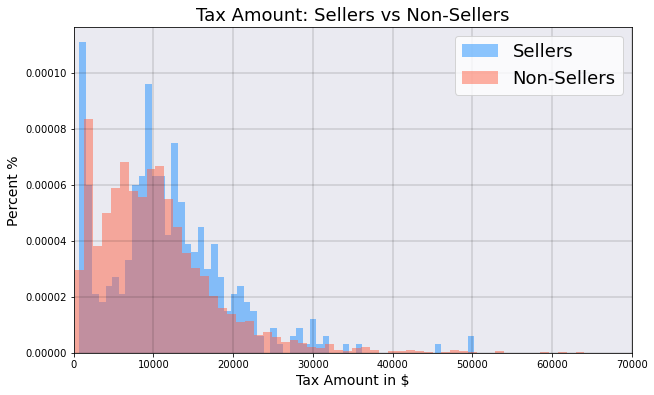

In [248]:
# 1: Tax Amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(HHE_Sellers_df['TAXAMT'], bins=60, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(HHE_NonSellers_df['TAXAMT'], bins=110, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Tax Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Tax Amount in $', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,70000)
plt.savefig('HHE_TaxAmount_DensityDistribution_SFR.png')

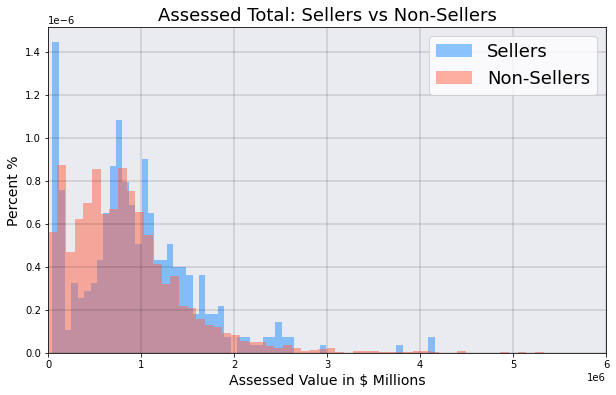

In [252]:
# 2: Assessed Value

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(HHE_Sellers_df['ASSDTOTAL'], bins=60, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(HHE_NonSellers_df['ASSDTOTAL'], bins=110, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Assessed Total: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Assessed Value in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,6000000)
plt.savefig('HHE_AssessedTotal_DensityDistribution_SFR.png')

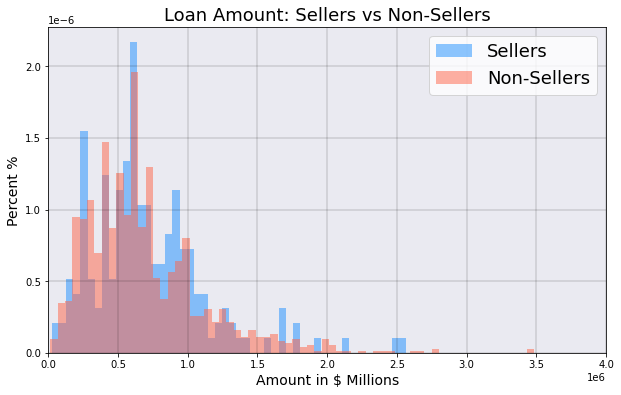

In [257]:
# 3: Loan Amount

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(HHE_Sellers_df['LOANAMOUT1'], bins=50, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(HHE_NonSellers_df['LOANAMOUT1'], bins=120, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Loan Amount: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Amount in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,4000000)
plt.savefig('HHE_LoanAmount_DensityDistribution_SFR.png')

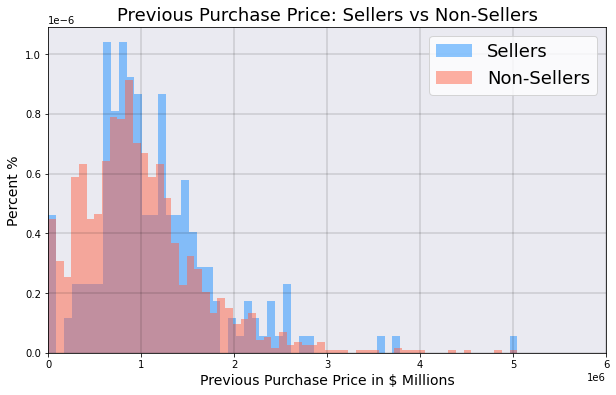

In [263]:
# 4: Price

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(HHE_Sellers_df['PRICE'], bins=60, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(HHE_NonSellers_df['PRICE'], bins=120, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Previous Purchase Price: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Previous Purchase Price in $ Millions', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')

ax.set_xlim(0,6000000)
plt.savefig('HHE_PreviousPurchasePrice_DensityDistribution_SFR.png')

/Users/Admin/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


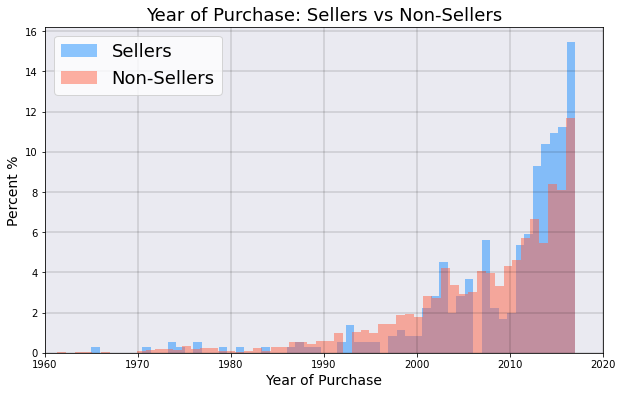

In [272]:
# 5: DOCDATE_YEAR

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(HHE_Sellers_df['DOCDATE_YEAR'], bins=57, alpha=0.5, density=True, color='dodgerblue', edgecolor='none')
ax.hist(HHE_NonSellers_df['DOCDATE_YEAR'], bins=77, alpha=0.5, density=True, color='tomato', edgecolor='none')
ax.set_title('Year of Purchase: Sellers vs Non-Sellers', fontsize=18)
ax.set_xlabel('Year of Purchase', fontsize=14)
ax.set_ylabel('Percent %', fontsize=14)

ax.legend(['Sellers', 'Non-Sellers'], fontsize=18)
ax.grid(color='black', linestyle='-', linewidth=0.2)
ax.set_facecolor('#eaeaf1')
ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16])

ax.set_xlim(1960, 2020)
plt.savefig('HHE_YearOfPurchse_DensityDistribution_SFR.png')